In [50]:
import numpy as np

import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            print(Rlist)
    R = Permutation(Rlist)
    print("R = ", R)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))
        print(Llist)

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)
    print("L = ", L)
    print("twisted_faces = ", R*L)    
    return R*L #, R, L, D

def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC


def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

def twisted_faces3(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
    R = Permutation(Rlist)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)  
    return R*L #, R, L, D






def sample_number_of_twisted_faces3(G,samples=10,do_twist=True):
    return [len(twisted_faces3(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad3(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges3(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return L


def number_of_CDC3(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return CDC


def change_tuple(x,y):
    L = (x,y)
    L = list(L)
    L.reverse()
    return tuple(L)


def Faces(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    return L

def Num_Bad_Pos_Neg(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    print("Bad Negative = ", Bad_Neg/2)
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    print("Bad Positive = ", Bad_Pos/2)
    return Bad_Neg/2, Bad_Pos/2


def Num_Bad_Pos_Neg1(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    return Bad_Neg/2, Bad_Pos/2


def List_Bad_Pos_Neg(G ,do_twist=True):
    L = list(Num_Bad_Pos_Neg1(G ,do_twist=do_twist))
    return L


def exp_number_of_Bad_Neg_Pos(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        g.append(e- (L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
    return [exp_size(Neg).n(20), exp_size(Pos).n(20), exp_size(g).n(20)]

    
    

def Neg_Pos_Good(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    T = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,do_twist = do_twist)
        g.append(e-(L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
        L.append(e-(L[0]+L[1]))
        T.append(L)
    return T


def diagram_N_P_G(G, samples=10, do_twist=True):
    m = G.num_edges()
    L = Neg_Pos_Good(G, samples = samples, do_twist = do_twist)
    P = line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=40)+ points([(x[0]) for x in L if x[1] == 0], color='black', size=20)
    return P

In [51]:
R = graphs.RandomRegular(3, 100)

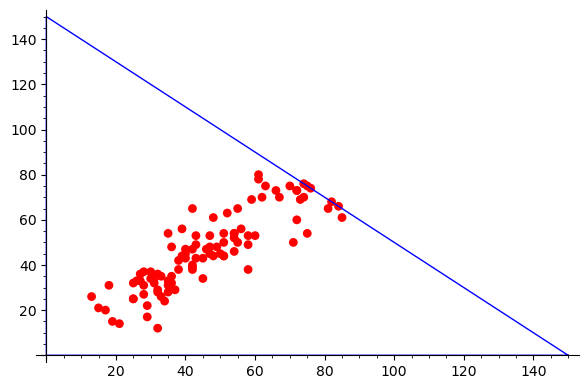

In [52]:
diagram_N_P_G(R, samples=100, do_twist=True)

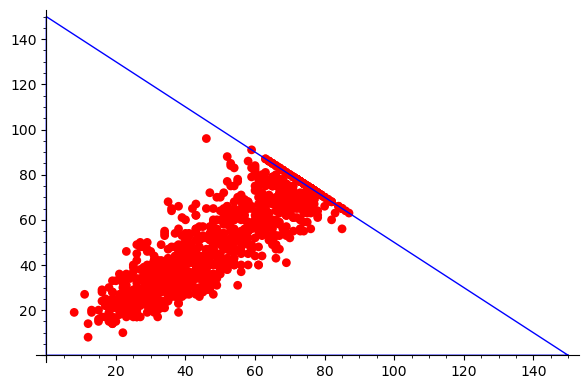

In [53]:
diagram_N_P_G(R, samples=1000, do_twist=True)

In [20]:
L = Neg_Pos_Good(R,samples=1000,do_twist=True)
len([x for x in L if x[1]==0])
print(L)

[[32, 30, 88], [78, 72, 0], [47, 36, 67], [76, 70, 4], [37, 49, 64], [35, 50, 65], [52, 70, 28], [26, 26, 98], [40, 43, 67], [18, 14, 118], [75, 72, 3], [77, 73, 0], [31, 41, 78], [36, 44, 70], [46, 48, 56], [87, 60, 3], [23, 32, 95], [40, 37, 73], [40, 39, 71], [76, 74, 0], [77, 73, 0], [42, 24, 84], [72, 58, 20], [70, 80, 0], [29, 39, 82], [53, 49, 48], [71, 71, 8], [69, 61, 20], [68, 61, 21], [52, 56, 42], [42, 49, 59], [51, 52, 47], [79, 67, 4], [44, 68, 38], [38, 43, 69], [32, 52, 66], [72, 75, 3], [66, 73, 11], [20, 29, 101], [47, 63, 40], [68, 73, 9], [41, 49, 60], [65, 65, 20], [67, 76, 7], [55, 55, 40], [72, 67, 11], [72, 67, 11], [73, 71, 6], [76, 71, 3], [66, 68, 16], [29, 29, 92], [60, 57, 33], [42, 34, 74], [58, 39, 53], [52, 56, 42], [77, 73, 0], [59, 91, 0], [50, 54, 46], [24, 30, 96], [32, 39, 79], [39, 42, 69], [29, 31, 90], [49, 53, 48], [20, 19, 111], [26, 30, 94], [33, 24, 93], [50, 39, 61], [28, 24, 98], [42, 31, 77], [38, 42, 70], [51, 50, 49], [69, 78, 3], [19, 1

In [21]:
exp_number_of_Bad_Neg_Pos(R,samples=1000,do_twist=True)

[50.843, 50.016, 49.141]

In [28]:
def exp_number_of_Bad_Neg_Pos5(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    T = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        print(L)
        g.append(e- (L[0]+L[1]))
        L.append(g)
        Neg.append(L[0])
        Pos.append(L[1])
        T.append(L)
    return [exp_size(Neg).n(20), exp_size(Pos).n(20), exp_size(g).n(20)]

R1 = graphs.RandomRegular(3,10000)
exp_number_of_Bad_Neg_Pos5(R1,samples=1,do_twist=True)

[6802, 6724]


[6802.0, 6724.0, 1474.0]

In [57]:
R2 = graphs.RandomRegular(3, 50)
R3 = graphs.RandomRegular(3, 70)
R4 = graphs.RandomRegular(3, 110)

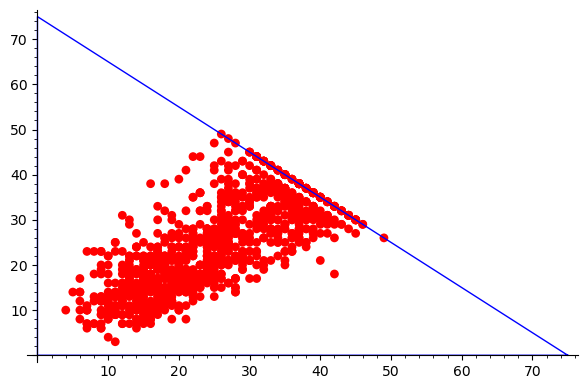

In [55]:
diagram_N_P_G(R2, samples=1000, do_twist=True)

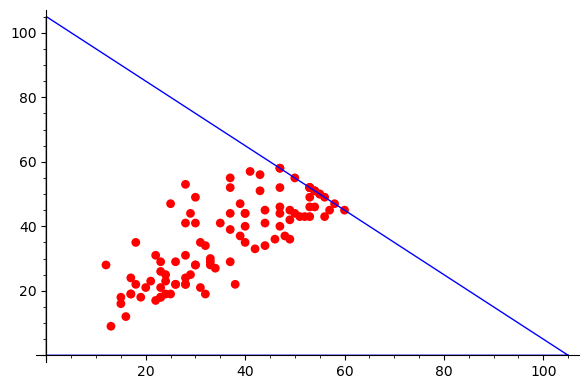

In [56]:
diagram_N_P_G(R3, samples=100, do_twist=True)

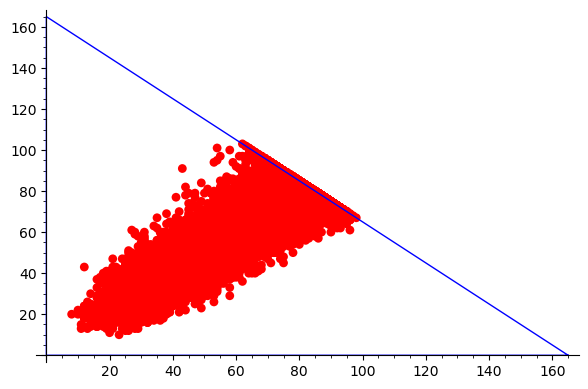

In [58]:
diagram_N_P_G(R4, samples=10000, do_twist=True)

In [59]:
G = graphs.CompleteGraph(4)

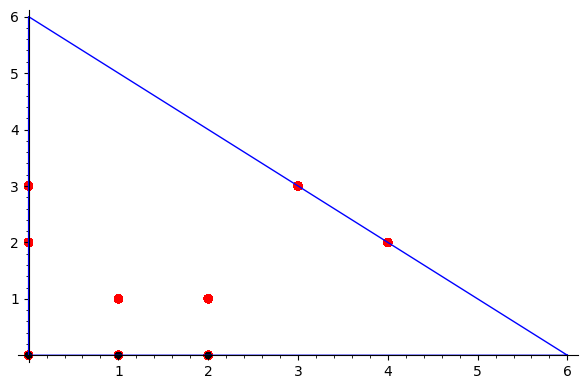

In [60]:
diagram_N_P_G(G, samples=10000, do_twist=True)

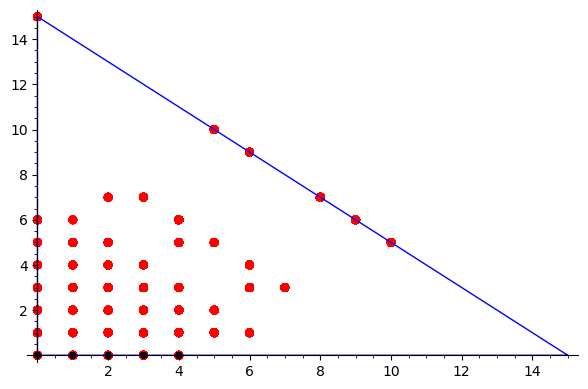

In [61]:
pt = graphs.PetersenGraph()
diagram_N_P_G(pt, samples=10000, do_twist=True)

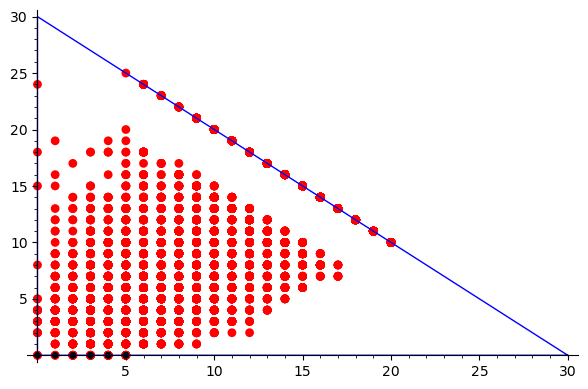

In [62]:
FL = graphs.FlowerSnark()
diagram_N_P_G(FL, samples=10000, do_twist=True)

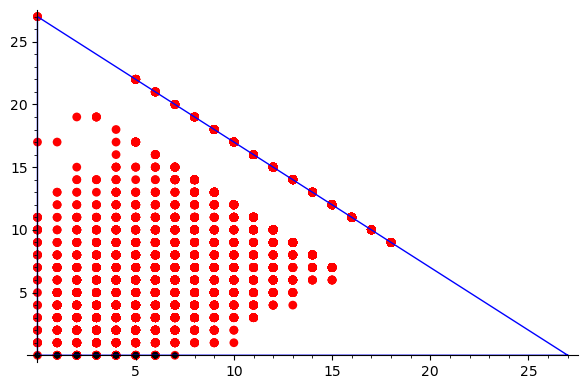

In [63]:
B2 = graphs.BlanusaSecondSnarkGraph()
diagram_N_P_G(B2, samples=10000, do_twist=True)

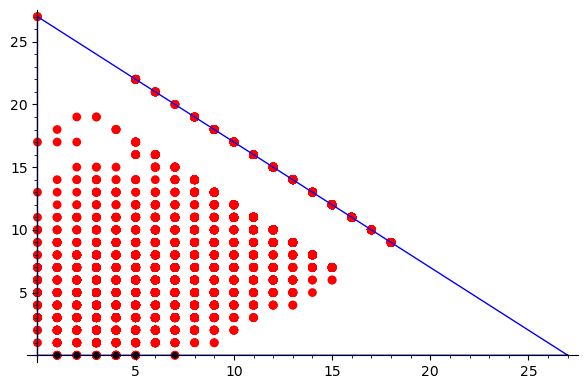

In [64]:
B1 = graphs.BlanusaFirstSnarkGraph()
diagram_N_P_G(B2, samples=10000, do_twist=True)

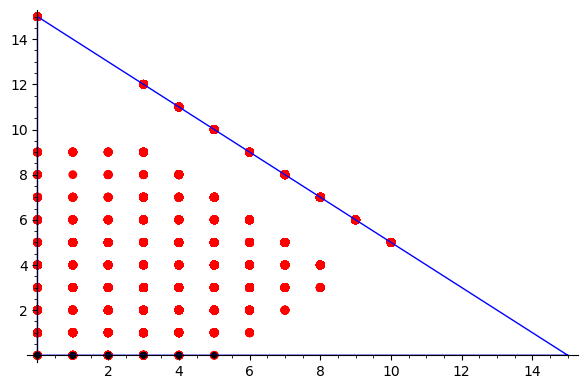

In [66]:
R10 = graphs.RandomRegular(3, 10)
diagram_N_P_G(R10, samples=10000, do_twist=True)

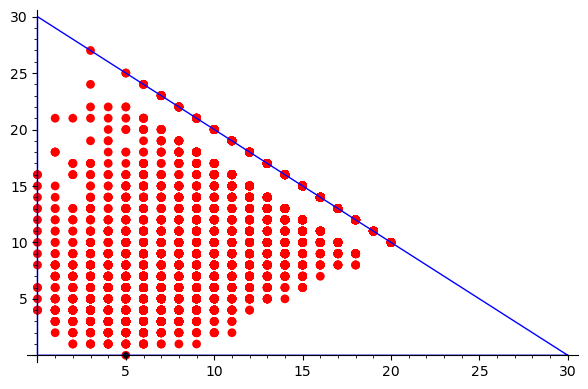

In [67]:
R20 = graphs.RandomRegular(3, 20)
diagram_N_P_G(R20, samples=10000, do_twist=True)

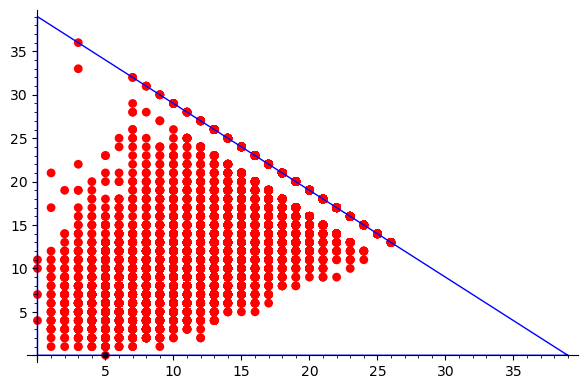

In [69]:
R26 = graphs.RandomRegular(3, 26)
diagram_N_P_G(R26, samples=10000, do_twist=True)

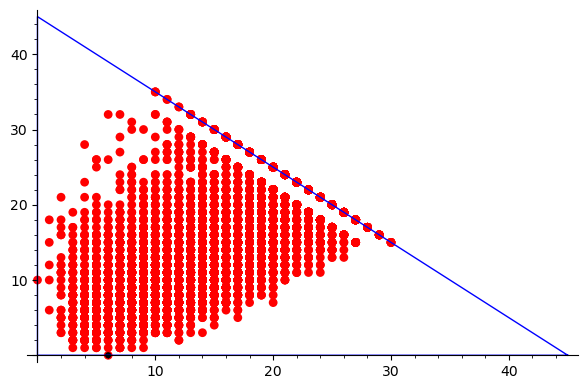

In [70]:
R30 = graphs.RandomRegular(3, 30)
diagram_N_P_G(R30, samples=10000, do_twist=True)

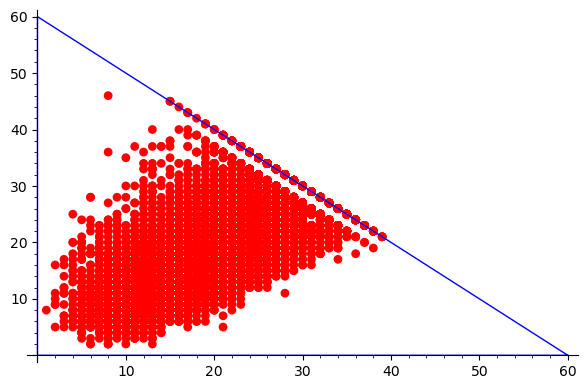

In [71]:
R40 = graphs.RandomRegular(3, 40)
diagram_N_P_G(R40, samples=10000, do_twist=True)

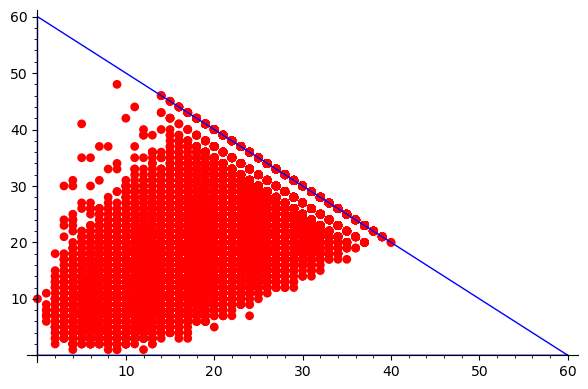

In [72]:
R40 = graphs.RandomRegular(3, 40)
diagram_N_P_G(R40, samples=50000, do_twist=True)

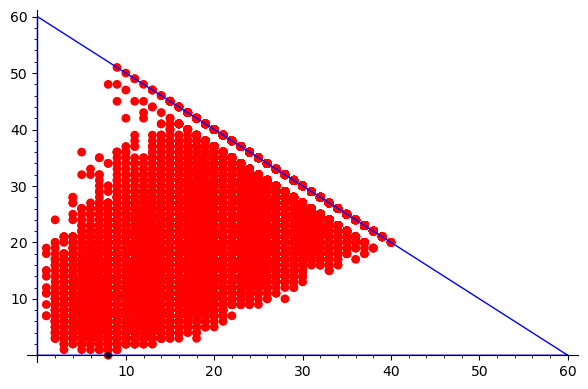

In [73]:
R40 = graphs.RandomRegular(3, 40)
diagram_N_P_G(R40, samples=100000, do_twist=True)